# Fake News and Pandas

In this notebook I am experimenting with pandas and twitter data. The main purpose is to explore the functionality of pandas and other related libraries but I am also exploring the last 3,400 tweets of MSNBC, CNN and FOX's twitter accounts to see what they have been tweeting about.

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('foxnews_tweets.csv')
df['created_at'] = pd.to_datetime(df['created_at'])
ffdf = df
ffdf.head()

,id,created_at,text
0,949777145626353665,2018-01-06 22:58:12,"b'Michael Waltz on North Korea: ""The Obama adm..."
1,949774816155983872,2018-01-06 22:48:56,"b'Michael Waltz: ""There is a real concern that..."
2,949773154905411589,2018-01-06 22:42:20,"b'On ""Cashin\' In,"" @RCamposDuffy praised @POT..."
3,949772627769544704,2018-01-06 22:40:15,b'Philadelphia firefighter among two killed in...
4,949770637542854658,2018-01-06 22:32:20,"b'.@JMfreespeech on Trump dossier: ""Christophe..."


After loading the data in you can see we have the tweet ID, the datetime the tweet was made and the text of the tweet itself. 

In [3]:
df = pd.read_csv('CNN_tweets.csv')
df['created_at'] = pd.to_datetime(df['created_at'])
cnndf = df
cnndf.head()

,id,created_at,text
0,949966415225901056,2018-01-07 11:30:17,b'A record-breaking 22 women are now serving i...
1,949959023486554112,2018-01-07 11:00:55,"b'""Donald Trump is a very dangerous man. He do..."
2,949958102555811842,2018-01-07 10:57:15,b'At least 17 civilians in the Syrian enclave ...
3,949951329245581313,2018-01-07 10:30:20,b'2017 was a defining year for American women....
4,949943807168208896,2018-01-07 10:00:27,b'Iceland just made it illegal to pay women le...


In [4]:
df = pd.read_csv('msnbc_tweets.csv')
df['created_at'] = pd.to_datetime(df['created_at'])
msnbcdf = df
msnbcdf.head()

,id,created_at,text
0,949822989377425408,2018-01-07 02:00:22,b'Is the new Clinton Foundation probe a threat...
1,949807874691272710,2018-01-07 01:00:18,b'Are key Republicans sabotaging the Russia pr...
2,949792744221921283,2018-01-07 00:00:11,"b""Rep. Meeks: Republicans giving up 'instituti..."
3,949777656605827072,2018-01-06 23:00:14,"b'Dr. Peterson: ""This president behaves himsel..."
4,949771323114389505,2018-01-06 22:35:03,b'Did Jeff Sessions seek \xe2\x80\x98dirt\xe2\...


In [5]:
msnbctext =""
cnntext=""
fftext=""

for i in msnbcdf['text']:
    msnbctext+=" "+str(i)

for i in cnndf['text']:
    cnntext+=" "+str(i)

for i in ffdf['text']:
    fftext+=" "+str(i)
    
textlist = [msnbctext,cnntext,fftext]

Here I am creating one string for each news site to take a look at the words these twitter accounts are tweeting and maybe get an idea on what sort of topics they have been focussing on. 

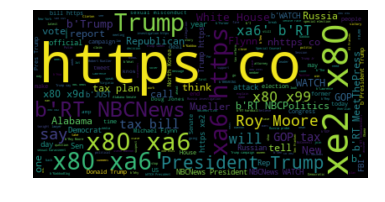

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(msnbctext)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

I created a word cloud from all of msnbc's last 3,400 tweets. Unfortunately, as you can see, the wordcloud generator has largely picked up text related to links (https and co) and text representing special characters (x80,xe2,x80 etc.). I'll have to cleanse these out to actullay have a worthwhile graphic.

In [7]:
import re

pattern = re.compile("(x9d|x98|b\'|xe2|https|http|co|x80|x99|xa6|RT)",re.I)
cleanmsn = pattern.sub("",msnbctext)
pattern = re.compile("(x9d|x98|b\'|xe2|https|http|co|x80|x99|xa6|RT)",re.I)
cleancnn = pattern.sub("",cnntext)
pattern = re.compile("(x9d|x98|b\'|xe2|https|http|co|x80|x99|xa6|RT)",re.I)
cleanff = pattern.sub("",fftext)

As I am still a bit of a python novice, I could not think of a better way to cleanse the text other than using regex which I am familiar with. Hopefully the wordcloud looks a bit better now...

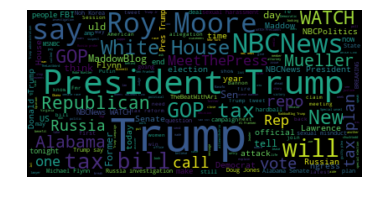

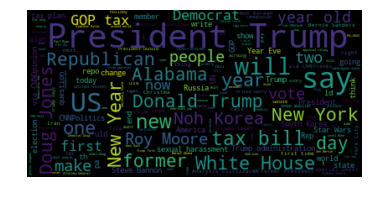

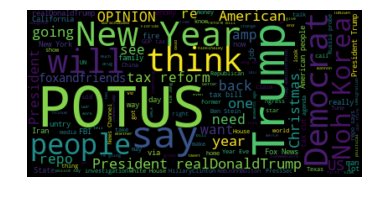

In [147]:
clean_list = [cleanmsn,cleancnn,cleanff]

for c in clean_list:
    wordcloud = WordCloud().generate(c)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()

Perhaps unsuprisingly, all three outlets seem pretty interested in talking about President Trump.

CNN and MSNBC seem to have a lot more to say about Roy Moore and Alabama than FOX, who are practically screaming the abbreviation POTUS!

In [9]:
print('moore occurrences: ')
for i in clean_list:
    count = i.lower().count('moore')
    print("number of matches: " + str(count))
    
print('christmas occurrences: ')
for i in clean_list:
    count = i.lower().count('christmas')
    print("number of matches: " + str(count))
    
print('fake occurrences: ')
for i in clean_list:
    count = i.lower().count('fake')
    print("number of matches: " + str(count))

print('wolff occurrences: ')
for i in clean_list:
    count = i.lower().count('wolff')
    print("number of matches: " + str(count))
    
print('trump occurrences: ')
for i in clean_list:
    count = i.lower().count('trump')
    print("number of matches: " + str(count))

print('korea occurrences: ')
for i in clean_list:
    count = i.lower().count('korea')
    print("number of matches: " + str(count))

moore occurrences: 
number of matches: 262
number of matches: 66
number of matches: 5
christmas occurrences: 
number of matches: 26
number of matches: 72
number of matches: 148
fake occurrences: 
number of matches: 9
number of matches: 11
number of matches: 15
wolff occurrences: 
number of matches: 17
number of matches: 12
number of matches: 20
trump occurrences: 
number of matches: 1283
number of matches: 570
number of matches: 509
korea occurrences: 
number of matches: 68
number of matches: 124
number of matches: 108


Another quite crude text analysis mirrors the word cloud - here I am simply counting the occurrence of a word in the strings I created. I plugged in some words I guessed would show up often: fake (as in Fake News), wolff (as in the book Fire and Fury), christmas and Korea.

Interestingly (to me) there aren't many references to 'wolff' - this could be because it has only happened recently or possibly my code is too crude!

In [10]:
msnbcdf1 = msnbcdf.set_index('created_at').groupby(pd.TimeGrouper('D')).count().dropna()
msnbcdfview = msnbcdf1.sort_values('id',ascending=False)
msnbcdfview.head()

,id,text
created_at,,
2017-12-13,111,111
2017-12-12,90,90
2017-12-20,85,85
2017-11-28,81,81
2018-01-04,80,80


Now I look at which dates did the most tweeting occur. It seems both MSNBC and CNN (below) had a tweet storm on the 13th of December. A quick google tells me that that was the date the Senate race in Alabama between Roy Moore and Doug Jones was won by Moore.

In [11]:
cnndf1 = cnndf.set_index('created_at').groupby(pd.TimeGrouper('D')).count().dropna()
cnndfview = cnndf1.sort_values('id',ascending=False)
cnndfview.head()

,id,text
created_at,,
2017-12-13,187,187
2017-12-19,178,178
2017-12-20,178,178
2017-12-15,171,171
2017-12-18,167,167


In [12]:
ffdf1 = ffdf.set_index('created_at').groupby(pd.TimeGrouper('D')).count().dropna()
ffdfv = ffdf1.sort_values('id',ascending=False)
ffdfv.head()

,id,text
created_at,,
2017-12-31,247,247
2018-01-06,243,243
2017-12-21,241,241
2017-12-24,226,226
2018-01-04,214,214


Interestingly, Fox did not have the same spike in tweets on the 13th of December. But that's probably because the 3,200 tweets I can get from them don't go back that far. Their largest day of tweeting was NYE, which I guess seems reasonable. 

What I now want to do is see which non 'stopword' words are used the most by each twitter account. I saw an example of how to do this on this blog: https://marcobonzanini.com/2015/03/17/mining-twitter-data-with-python-part-3-term-frequencies/ and thought it was a pretty simple example I could implement here. 

In [15]:
import string
from collections import Counter
import operator
from nltk.corpus import stopwords

punctuation = list(string.punctuation)
stop = stopwords.words('english')

def create_terms(words,n):
    word_punc = ''.join([c for c in words if c not in punctuation])
    word_terms = word_punc.lower().split()
    clean_word_terms = [word for word in word_terms if word not in stop]
    return clean_word_terms
    
def count_terms(words,n):
    count_all = Counter()
    count_all.update(words)
    return count_all.most_common(n)

n = 10

clean_ff_terms = create_terms(cleanff,n)
clean_cnn_terms = create_terms(cleancnn,n)
clean_msn_terms = create_terms(cleanmsn,n)

print(count_terms(clean_ff_terms,n))
print(count_terms(clean_cnn_terms,n))
print(count_terms(clean_msn_terms,n))

[('potus', 403), ('trump', 236), ('president', 224), ('new', 219), ('tax', 183), ('year', 159), ('think', 145), ('people', 139), ('christmas', 135), ('says', 131)]
[('trump', 407), ('president', 399), ('new', 287), ('us', 255), ('says', 224), ('tax', 205), ('year', 204), ('house', 155), ('2018', 151), ('trumps', 144)]
[('trump', 963), ('nbcnews', 373), ('president', 365), ('tax', 288), ('gop', 254), ('trumps', 239), ('moore', 232), ('says', 208), ('roy', 207), ('house', 203)]


Unsurprisingly for all three news outlets potus, trump and president are somewhere in the top words. All three are speaking about tax, Fox are talking about Christmas (the war on Christmas maybe?) and MSNBC again are talking about Roy Moore. 

Now I want to try and create a co-occurrence matrix which (according to my understanding!) is a matrix of which terms occurr together. Again I got the idea for this from the blog above, you can see from the timestamps that this took it's toll on my poor little laptop, with run times in the hundreds of seconds. 

In [16]:
from collections import defaultdict
import time
start_time = time.time()

def create_com(clean_words):
    com = defaultdict(lambda: defaultdict(int))
    for i in range(len(clean_words)-1):
        for j in range(i+1,len(clean_words)):
            w1, w2 = sorted([clean_words[i],clean_words[j]])
            if w1 != w2:
                com[w1][w2] += 1
    return com
 
ff_com = create_com(clean_ff_terms)
print("---%s seconds ---" % (time.time() - start_time))

---605.602997303009 seconds ---


In [17]:
start_time = time.time()
cnn_com = create_com(clean_cnn_terms)
print("---%s seconds ---" % (time.time() - start_time))

---809.7714598178864 seconds ---


In [18]:
start_time = time.time()
msn_com = create_com(clean_msn_terms)
print("---%s seconds ---" % (time.time() - start_time))

---640.5852701663971 seconds ---


In [23]:
def mark_com(com,n):
    com_max = []
    for t1 in com:
        t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1),reverse=True)[:5]
        for t2, t2_count in t1_max_terms:
            com_max.append(((t1,t2),t2_count))
    terms_max = sorted(com_max, key=operator.itemgetter(1),reverse=True)
    return terms_max[:n]

With the matrices completed, I can now look at which terms occur together most frequently.

In [25]:
print(mark_com(ff_com,10))

[(('potus', 'trump'), 95108), (('potus', 'president'), 90272), (('new', 'potus'), 88257), (('potus', 'tax'), 73749), (('potus', 'year'), 64077), (('potus', 'think'), 58435), (('people', 'potus'), 56017), (('christmas', 'potus'), 54405), (('president', 'trump'), 52864), (('new', 'trump'), 51684)]


In [26]:
print(mark_com(cnn_com,10))

[(('president', 'trump'), 162393), (('new', 'trump'), 116809), (('new', 'president'), 114513), (('trump', 'us'), 103785), (('president', 'us'), 101745), (('says', 'trump'), 91168), (('president', 'says'), 89376), (('tax', 'trump'), 83435), (('trump', 'year'), 83028), (('president', 'tax'), 81795)]


In [27]:
print(mark_com(msn_com,10))

[(('nbcnews', 'trump'), 359199), (('president', 'trump'), 351495), (('tax', 'trump'), 277344), (('gop', 'trump'), 244602), (('trump', 'trumps'), 230157), (('moore', 'trump'), 223416), (('says', 'trump'), 200304), (('roy', 'trump'), 199341), (('house', 'trump'), 195489), (('bill', 'trump'), 164673)]


Again the results are all as you would expect. Trump and President and Trump and Tax. Something I thought was interesting for FOX was Christmas and Potus - my guess is that this would be the War on Christmas again.

Now I decided that I wanted to get some practice using visualisations with matplotlib/seaborn. The first thing I want to do is to plot tweets over time by grouping together each outlet's tweets by hour and summarizing them.

In [9]:
dfs = [ffdf,cnndf,msnbcdf]
ffdfTrp
cnndfTrp
msnbcdfTrp

def tweetbytime(df):
    df['time'] = pd.Series([val.time() for val in df['created_at']])
    timegroup = df.groupby(['time'])['id'].count().reset_index()
    timegroup['hour'] = [r.hour for r in timegroup['time']]
    timegroup = timegroup.groupby(['hour'])['id'].count()
    return timegroup.reset_index()

fftimedf = tweetbytime(ffdf)
cnntimedf = tweetbytime(cnndf)
msntimedf = tweetbytime(msnbcdf)

fftimedf = fftimedf.rename(columns={'hour':'hour','id':'foxcount'})
cnntimedf = cnntimedf.rename(columns={'hour':'hourC','id':'cnncount'})
msntimedf = msntimedf.rename(columns={'hour':'hourM','id':'msncount'})

tweets_by_hour = pd.concat([fftimedf,cnntimedf,msntimedf],axis=1)
tweets_by_hour = tweets_by_hour.drop(['hour','hourC','hourM'],axis=1)

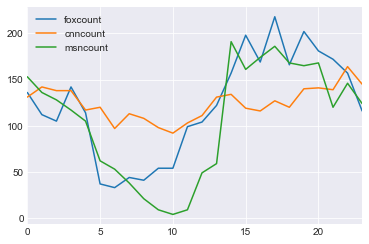

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

tweets_by_hour.plot()
plt.show()

I thought it was strange that there seems to be a difference between CNN's tweeting pattern and MSNBC and FOX. While the time along the x-axis is GMT (I definitely need to read up on how to convert timezones) you can roughly see that MSNBC and FOX start tweeting through what I assume is the US morning, peaking around lunchtime and then dropping off in the evening. Converseley, CNN are tweeting throughout the day. My guess is that CNN is appealing to a more global audience and therefore has a team tweeting consistently across timezones? This might be something worth looking at in a later piece of analysis.

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


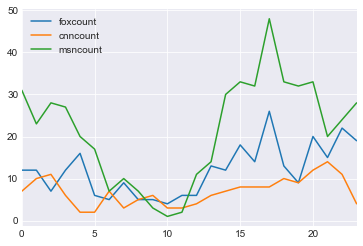

In [119]:
ffdfTrp = ffdf[(ffdf['trump check'] == 'True')]
cnndfTrp = cnndf[(cnndf['trump check'] == 'True')]
msnbcdfTrp = msnbcdf[(msnbcdf['trump check'] == 'True')]

ffdfTtime = tweetbytime(ffdfTrp)
cnndfTtime = tweetbytime(cnndfTrp)
msnbcdfTtime = tweetbytime(msnbcdfTrp)

ffdfTtime = ffdfTtime.rename(columns={'hour':'hour','id':'foxcount'})
cnndfTtime = cnndfTtime.rename(columns={'hour':'hourC','id':'cnncount'})
msnbcdfTtime = msnbcdfTtime.rename(columns={'hour':'hourM','id':'msncount'})

tweets_by_hourTr = pd.concat([ffdfTtime,cnndfTtime,msnbcdfTtime],axis=1)
tweets_by_hourTr = tweets_by_hourTr.drop(['hour','hourC','hourM'],axis=1)

tweets_by_hourTr.plot()
plt.show()

With this visualisation I wanted to see what the same pattern was for tweets that included a reference to Trump/the President/the POTUS. Similar pattern to the overall trend - CNN steady and FOX and MSNBC spiking in the middle of the day. Another interesting thing I thought was the shared spike for both FOX and MSNBC at what looks like roughly the late morning and lunchtime depending on the timezone. Is this because on one day they both made a huge amount of Trump tweets at that time? If that was the case, why didn't CNN? Or could they be racking up stuff to tweet about to release over lunch when they know people are looking? Again I find it odd that CNN aren't doing this - surely their market is predominantly North American? 

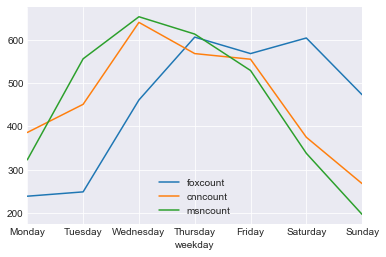

In [11]:
for df in dfs:
    df['weekday'] = df['created_at'].dt.weekday_name
    df['hour'] = [r.hour for r in df['time']]
    
def weekdata(df):
    weekgroup = df.groupby(['weekday','hour'])['id'].count()
    weekandhourdf = weekgroup.reset_index()
    weekonlydf = df.groupby(['weekday'])['id'].count().reset_index()
    weekonlydf['weekday'] = pd.Categorical(weekonlydf['weekday'],['Monday','Tuesday','Wednesday',
                                                             'Thursday','Friday','Saturday',
                                                             'Sunday'])
    weekonlydf = weekonlydf.sort_values('weekday')
    return weekonlydf

ff_weekdays = weekdata(ffdf)
cnn_weekdays = weekdata(cnndf)
msn_weekdays = weekdata(msnbcdf)

ff_weekdays = ff_weekdays.rename(columns={'weekday':'weekday','id':'foxcount'})
cnn_weekdays = cnn_weekdays.rename(columns={'weekday':'weekdaycnn','id':'cnncount'})
msn_weekdays = msn_weekdays.rename(columns={'weekday':'weekdaymsn','id':'msncount'})

tweets_by_day = pd.concat([ff_weekdays,cnn_weekdays,msn_weekdays],axis=1)
tweets_by_day = tweets_by_day.drop(['weekdaycnn','weekdaymsn'],axis=1)

tweets_by_day.plot(x='weekday')
plt.show()

With this visualisation above I wanted to see the weekly tweeting pattern. While there are some key differences there does seem to be a mid week peak and a drop off on the weekend. I thought it was interesting that FOX isn't dropping off on Saturday and Sunday  nearly as much but they absolutely cannot be bothered on Monday!

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


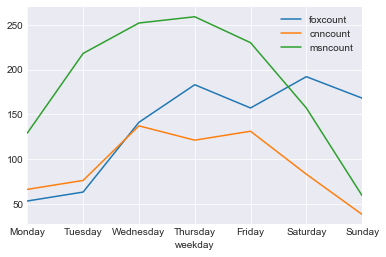

In [126]:
Trdfs = [ffdfTrp,cnndfTrp,msnbcdfTrp]

for df in Trdfs:
    df['weekday'] = df['created_at'].dt.weekday_name
    
ff_weekdaysTr = weekdata(ffdfTrp)
cnn_weekdaysTr = weekdata(cnndfTrp)
msn_weekdaysTr = weekdata(msnbcdfTrp)

ff_weekdaysTr = ff_weekdaysTr.rename(columns={'weekday':'weekday','id':'foxcount'})
cnn_weekdaysTr = cnn_weekdaysTr.rename(columns={'weekday':'weekdaycnn','id':'cnncount'})
msn_weekdaysTr = msn_weekdaysTr.rename(columns={'weekday':'weekdaymsn','id':'msncount'})

tweets_by_dayTr = pd.concat([ff_weekdaysTr,cnn_weekdaysTr,msn_weekdaysTr],axis=1)
tweets_by_dayTr = tweets_by_dayTr.drop(['weekdaycnn','weekdaymsn'],axis=1)

tweets_by_dayTr.plot(x='weekday')
plt.show()

Clearly I need to start paying attention to the warnings and use .loc correctly but I am getting lazy! 

With this visualisation I wanted to see the weekly tweeting pattern for 'Trump' tweets. Again I think all three are showing a roughly similar trend - low on mondays, peaking in the midweek and tailing off on the weekend. 

The next thing I wanted to do was really get a look at who is obsessed with tweeting about Trump! My approach was to basically split the tweets between 'trump' tweets and non trump tweets:

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


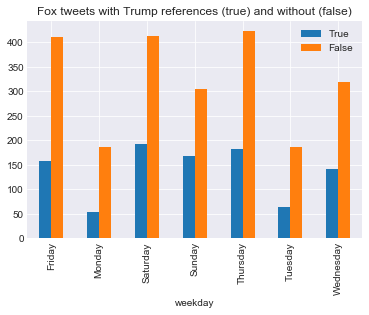

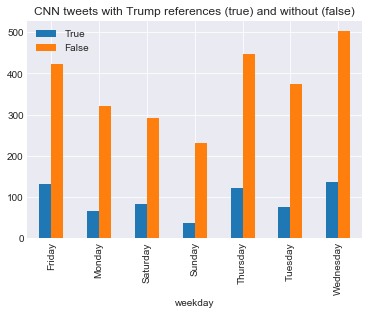

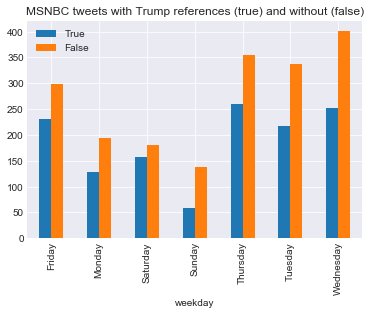

In [14]:
for df in dfs:
    df['text'] = df['text'].str.lower()
    df['trump check'] = np.where(df['text'].str.contains('(trump|potus|president)'),'True','False')

def trump_check(df):
    trumpff = df.groupby(['trump check','weekday'])['id'].count().reset_index()
    trumpfftrue = trumpff.loc[(trumpff['trump check'] == 'True')]
    trumpfffalse = trumpff.loc[(trumpff['trump check'] == 'False')]
    trumpfftrue = trumpfftrue.rename(columns={'id':'True'}).drop(['trump check'],axis=1).reset_index()
    trumpfffalse = trumpfffalse.rename(columns={'id':'False'}).drop(['trump check','weekday'],axis=1).reset_index()
    trumpg = pd.concat([trumpfffalse,trumpfftrue],axis=1,)
    trumpg = trumpg.drop(['index','index'],axis=1)
    return trumpg

ffdf_trump = trump_check(ffdf)
cnn_trump = trump_check(cnndf)
msnbc_trump = trump_check(msnbcdf)

plt.clf()
ffdf_trump.plot.bar(x='weekday',y=['True','False'],title='Fox tweets with Trump references (true) and without (false)')
cnn_trump.plot.bar(x='weekday',y=['True','False'],title='CNN tweets with Trump references (true) and without (false)')
msnbc_trump.plot.bar(x='weekday',y=['True','False'],title='MSNBC tweets with Trump references (true) and without (false)')
plt.show()

So I guess Trump would probably feel somewhat vindicated - MSNBC seem to be tweeting just under half of the time about him on most days. However, CNN seem to be tweeting about him proportionately less than FOX. My guess for this would again be that they are trying to cover a much larger range of news stories to appeal to a global audience. I decided to do without the weekday split and do the same trump tweet vs. not trump tweet comparison overall below:

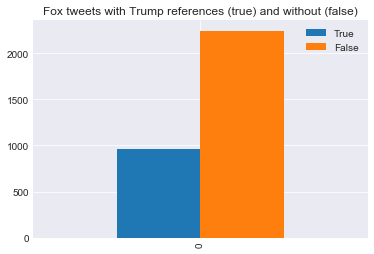

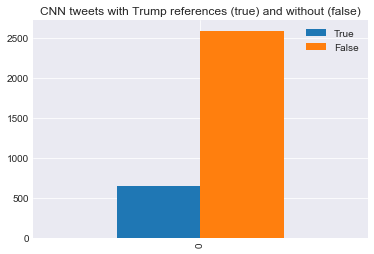

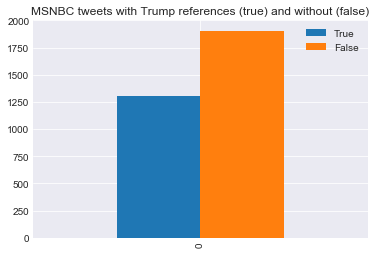

In [129]:
def trump_check_ovr(df):
    trumpff = df.groupby(['trump check'])['id'].count().reset_index()
    trumpfftrue = trumpff.loc[(trumpff['trump check'] == 'True')]
    trumpfffalse = trumpff.loc[(trumpff['trump check'] == 'False')]
    trumpfftrue = trumpfftrue.rename(columns={'id':'True'}).drop(['trump check'],axis=1).reset_index()
    trumpfffalse = trumpfffalse.rename(columns={'id':'False'}).drop(['trump check'],axis=1).reset_index()
    trumpg = pd.concat([trumpfffalse,trumpfftrue],axis=1,)
    trumpg = trumpg.drop(['index','index'],axis=1)
    return trumpg

ffdf_trump = trump_check_ovr(ffdf)
cnn_trump = trump_check_ovr(cnndf)
msnbc_trump = trump_check_ovr(msnbcdf)

plt.clf()
ffdf_trump.plot.bar(y=['True','False'],title='Fox tweets with Trump references (true) and without (false)')
cnn_trump.plot.bar(y=['True','False'],title='CNN tweets with Trump references (true) and without (false)')
msnbc_trump.plot.bar(y=['True','False'],title='MSNBC tweets with Trump references (true) and without (false)')
plt.show()

Another blog I came across covered 'sentiment analysis' (here: https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-) which I thought would also be pretty cool to try. Below I copied a simple function to apply Text Blob's sentiment analysis to my tweets from the blog linked above.

In [52]:
from textblob import TextBlob

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

ffdf['tweet_text'] = ffdf['text'].apply(clean_tweet)
cnndf['tweet_text'] = cnndf['text'].apply(clean_tweet)
msnbcdf['tweet_text'] = msnbcdf['text'].apply(clean_tweet)

def analyse_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity ==0:
        return 0
    else:
        return -1
    
ffdf['polarity'] = ffdf['tweet_text'].apply(analyse_sentiment)
cnndf['polarity'] = cnndf['tweet_text'].apply(analyse_sentiment)
msnbcdf['polarity'] = msnbcdf['tweet_text'].apply(analyse_sentiment)

In [132]:
def sentiment_scores(df):
    pos_tweets = [tweet for index, tweet in enumerate(df['tweet_text']) if df['polarity'][index]>0]
    neutral_tweets = [tweet for index, tweet in enumerate(df['tweet_text']) if df['polarity'][index]==0]
    neg_tweets = [tweet for index, tweet in enumerate(df['tweet_text']) if df['polarity'][index]<0]
    return pos_tweets,neutral_tweets,neg_tweets

foxpos_tweets,foxneutral_tweets,foxneg_tweets = sentiment_scores(ffdf)
cnnpos_tweets,cnnneutral_tweets,cnnneg_tweets = sentiment_scores(cnndf)
msnbcpos_tweets,msnbcneutral_tweets,msnbcneg_tweets = sentiment_scores(msnbcdf)

In [57]:
print('Fox positive tweet percentage: '+str(len(foxpos_tweets)*100/len(ffdf['tweet_text'])))
print('Fox neutral tweet percentage: '+str(len(foxneutral_tweets)*100/len(ffdf['tweet_text'])))
print('Fox negative tweet percentage: '+str(len(foxneg_tweets)*100/len(ffdf['tweet_text'])))

Fox positive tweet percentage: 35.125
Fox neutral tweet percentage: 47.875
Fox negative tweet percentage: 17.0


In [60]:
print('CNN positive tweet percentage: '+str(len(cnnpos_tweets)*100/len(cnndf['tweet_text'])))
print('CNN neutral tweet percentage: '+str(len(cnnneutral_tweets)*100/len(cnndf['tweet_text'])))
print('CNN negative tweet percentage: '+str(len(cnnneg_tweets)*100/len(cnndf['tweet_text'])))

CNN positive tweet percentage: 40.73388837496145
CNN neutral tweet percentage: 42.429848905334566
CNN negative tweet percentage: 16.836262719703978


In [133]:
print('MSNBC positive tweet percentage: '+str(len(msnbcpos_tweets)*100/len(msnbcdf['tweet_text'])))
print('MSNBC neutral tweet percentage: '+str(len(msnbcneutral_tweets)*100/len(msnbcdf['tweet_text'])))
print('MSNBC negative tweet percentage: '+str(len(msnbcneg_tweets)*100/len(msnbcdf['tweet_text'])))

MSNBC positive tweet percentage: 31.598628856341538
MSNBC neutral tweet percentage: 52.695543783110004
MSNBC negative tweet percentage: 15.705827360548458


The above results give a slight insight into how positive/neutral/negative the tweets from the three outlets are. I'll have to take a closer look into how Text Blob works because I'm not sure if the 'neutral' percentage is so high because the algorithm is too simple or because the tweets really are neutral. It seems like MSNBC are the most neutral by a significant margin, while FOX are just slightly more negative. 

In [104]:
ffdfTr = ffdf[(ffdf['trump check'] == 'True')]
ffdfTr.reset_index()

foxpos_tweets,foxneutral_tweets,foxneg_tweets = sentiment_scores(ffdfTr)

In [107]:
print('Fox positive tweet percentage: '+str(len(foxpos_tweets)*100/len(ffdfTr['tweet_text'])))
print('Fox neutral tweet percentage: '+str(len(foxneutral_tweets)*100/len(ffdfTr['tweet_text'])))
print('Fox negative tweet percentage: '+str(len(foxneg_tweets)*100/len(ffdfTr['tweet_text'])))

Fox positive tweet percentage: 36.25914315569488
Fox neutral tweet percentage: 49.11180773249739
Fox negative tweet percentage: 14.629049111807733


In [114]:
cnndfTr = cnndf[(cnndf['trump check'] == 'True')]
cnndfTr = cnndfTr.reset_index()

cnnpos_tweets,cnnneutral_tweets,cnnneg_tweets = sentiment_scores(cnndfTr)

print('CNN positive tweet percentage: '+str(len(cnnpos_tweets)*100/len(cnndfTr['tweet_text'])))
print('CNN neutral tweet percentage: '+str(len(cnnneutral_tweets)*100/len(cnndfTr['tweet_text'])))
print('CNN negative tweet percentage: '+str(len(cnnneg_tweets)*100/len(cnndfTr['tweet_text'])))

CNN positive tweet percentage: 39.11042944785276
CNN neutral tweet percentage: 46.77914110429448
CNN negative tweet percentage: 14.110429447852761


In [113]:
msnbcdfTr = msnbcdf[(msnbcdf['trump check'] == 'True')]
msnbcdfTr = msnbcdfTr.reset_index()

msnbcpos_tweets,msnbcneutral_tweets,msnbcneg_tweets = sentiment_scores(msnbcdfTr)

print('MSNBC positive tweet percentage: '+str(len(msnbcpos_tweets)*100/len(msnbcdfTr['tweet_text'])))
print('MSNBC neutral tweet percentage: '+str(len(msnbcneutral_tweets)*100/len(msnbcdfTr['tweet_text'])))
print('MSNBC negative tweet percentage: '+str(len(msnbcneg_tweets)*100/len(msnbcdfTr['tweet_text'])))

MSNBC positive tweet percentage: 27.530674846625768
MSNBC neutral tweet percentage: 54.984662576687114
MSNBC negative tweet percentage: 17.484662576687118


Above I run the sentiment analysis for the tweets that only reference Trump. Perhaps surprisingly for the 'fake news' crew it doesn't seem like there is much difference to their overall positive/neutral/negative trend. If anything, CNN and MSNBC are more positive apparently. Which I find strange..! 

In [140]:
ffdf['Trumpdummy'] = np.where(ffdf['trump check'] == 'True',1,0)
ffdf['Trumpdummy'].corr(ffdf['polarity'])

0.032760752897006348

In [141]:
cnndf['Trumpdummy'] = np.where(cnndf['trump check'] == 'True',1,0)
cnndf['Trumpdummy'].corr(cnndf['polarity'])

0.0076790295906365583

In [145]:
msnbcdf['Trumpdummy'] = np.where(msnbcdf['trump check'] == 'True',1,0)
msnbcdf['Trumpdummy'].corr(msnbcdf['polarity'])

-0.072289175383233942

I wanted to give the correlation method a go, was not expecting anything significant to turn up and it didn't!

------------------------------------------------------------------------------------------------------------------------------

That about does it for me - I feel like I've tried a good number of things out and found a lot of areas where I need to improve before I continue. Definitely need to be more consistent and clear with my dataframe naming conventions and to pay more attention to warning messages! 

In terms of what I think I have learnt: 

1. I can't really see anything unusual across either of three outlets. All three talk about Trump a heck of a lot - but then, he is the President. CNN appear to tweet about him the least of the three - possibly because they are tweeting about other non-North American issues more than the other two. Although it appears that FOX didn't tweet about Roy Moore, I think this is largely down to the fact their 3,200 odd tweets didn't quite go back to the 13th. 


2. FOX and MSNBC seem to be targeting their tweets at the US market given the tweet by time analysis. It appears that they are racking up stuff to tweet about over lunch time. CNN on the other hand seem to tweet pretty consistently throughout the day - my hypothesis here is that they are again tracking a global market as opposed to just the US.


3. Using a simple sentiment analysis it seems that none of the three outlets are specifically negative or positive in their tweeting patterns, but my assumption here is that most tweets are using relatively neutral language and the negativity/positivity probably sits heavier in the news stories themselves or that my analysis was just too crude to pick up on any negativity/positivity.